In [144]:
import pandas as pd
import scipy.optimize as opt;

Df = pd.read_csv("../../membershipchainservice/Data/messages.txt")
Df_storage = pd.read_csv("../../membershipchainservice/Data/storage.txt")
Df_storage

,Name,Function,storage,epoch
0,node_1,Pings,264,1
1,node_0,Pings,264,1
2,node_3,Pings,264,1
3,node_2,Pings,264,1
4,node_4,Pings,392,2
...,...,...,...,...
103,node_0,Pings,1368,9
104,node_4,Pings,1368,9
105,node_19,Pings,1368,9
106,node_6,Pings,1368,9


In [145]:
Df["nb Nodes"] = Df["epoch"].apply(lambda epoch : max(4,2+epoch*2))
Df_storage["nb Nodes"] = Df_storage["epoch"].apply(lambda epoch : max(4,2+epoch*2))

NameError: name 'func' is not defined

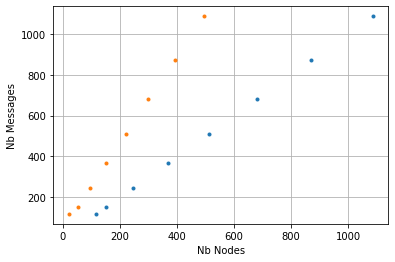

In [150]:
def func_x2(x, a, b, c):
     return a * x^2 + c
    


import matplotlib.pyplot as plt


sums = Df.groupby("nb Nodes").sum()
plt.plot(sums["nb_messages"][:-1], ".")
plt.grid(True)
plt.ylabel("Nb Messages")
plt.xlabel("Nb Nodes")

optimizedParameters, pcov = opt.curve_fit(func, sums["nb_messages"][:-1], ydata);


plt.savefig("../../latex/thesis_template/figures/messages-plot.pdf")

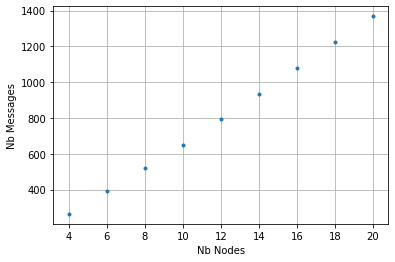

In [147]:
import matplotlib.pyplot as plt

data = Df_storage[Df_storage["Name"]=="node_0"]
plt.plot(data["nb Nodes"],data["storage"], ".")

plt.grid(True)
plt.ylabel("Nb Messages")
plt.xlabel("Nb Nodes")

plt.savefig("../../latex/thesis_template/figures/storage-plot.pdf")

In [148]:
data

,Name,Function,storage,epoch,nb Nodes
1,node_0,Pings,264,1,4
5,node_0,Pings,392,2,6
14,node_0,Pings,520,3,8
22,node_0,Pings,648,4,10
31,node_0,Pings,792,5,12
47,node_0,Pings,936,6,14
61,node_0,Pings,1080,7,16
74,node_0,Pings,1224,8,18
103,node_0,Pings,1368,9,20
